<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [jonhselmo.com.br](https://jonhselmo.com.br)*


#Contextualização

Hoje não conseguimos mais imaginar a vida sem a internet. Com ela, aprendemos que existem novas forma de trabalhar, em que a presença física no escritório já não é uma obrigatoriedade, novas formas de entretenimento, jogos e séries de streaming, e também, novas formas de comprar, em que não temos mais que ir em um monte de lojas para tentarmos encontrar o produto do nosso desejo. Podemos fazer tudo de casa, com poucos cliques. Basta termos um cartão de crédito e pronto, podemos pagar por tudo aquilo que sonhamos E que nosso limite de crédito permite.

De acordo com a Boa Vista Serviços, somente no primeiro semestre do ano de 2012 foram registrados mais de um milhão de tentativas de fraudes contra consumidores no Brasil. Isto significa uma tentativa em aproximadamente 30 segundos. Já em 2019, o Raio-X da Fraude 2019 apontou que, de cada 45 compras feitas no ambiente online, 1 é de origem fraudulenta. Além disso, teve uma tentativa a cada 6,5 segundos (quase 05 vezes mais, se comparado a 2012). Dessa forma, é de suma importância que as empresas emissoras de cartão de crédito estejam preparadas para este tipo de crime, monitorando constantemente o comportamento de utilização dos cartões. 

Neste post, vamos criar um modelo preditivo, com técnicas de machine learning, para detecção de fraude em cartões de crédito e medir a robustez do modelo, a partir de métricas de eficiência.

#Aquisição de dados

Os dados trabalhados são o dataset disponibilizado pelo curso Sigmoidal.

In [2]:
PATH = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

In [3]:
#importa das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#criar dataframe
df = pd.read_csv(PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##Resumo estatístico da base de dados

###Quantidade de linhas e colunas.

In [6]:
#verificação dos números das variáveis
print("Quantidade de linhas: \t {}".format(df.shape[0]))
print("Quantidade de colunas: \t {}".format(df.shape[1]))


Quantidade de linhas: 	 284807
Quantidade de colunas: 	 31


### Verificação da existência de dados nulos.

In [7]:
#dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Verificada a inexistência de dados nulos.

# Padronização dos dados

Verificamos que a maioria dos dados estão na mesma escala, com excessão das variáveis `Time` e `Amount`.

Vamos utilizar a normalização média.



$z = \frac{x - \mu }{\sigma }$






In [9]:
#padronização z-score
df.Time = (df['Time'] - df['Time'].mean()) / df['Time'].std()
df.Amount = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996580,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996580,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474,0
2,-1.996558,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684,0
3,-1.996558,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996537,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


#Divisão dos dados em Treino e Teste

In [11]:
#dividir dados em train e test
X = df.drop('Class', axis=1)
y = df.Class

Verificação dos shapes

In [12]:
print('X :{}'.format(X.shape))
print('y :{}'.format(y.shape))

X :(284807, 30)
y :(284807,)


Havia 31 colunas inicialmente. 30 foram para o frame X e 01 para o frame y.

In [13]:
print('Colunas do X:\n', X.columns)
print('Colunas do y:\n', y)

Colunas do X:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Colunas do y:
 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


##Dividir em Treino e Teste



In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(213605, 30)
(71202, 30)
(213605,)
(71202,)


#Verificação do Balanceamento dos dados



####Verificação das porcentagens de dados

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

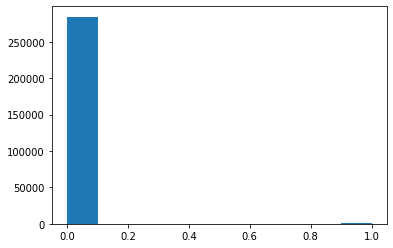

In [17]:
plt.hist('Class', data=df)

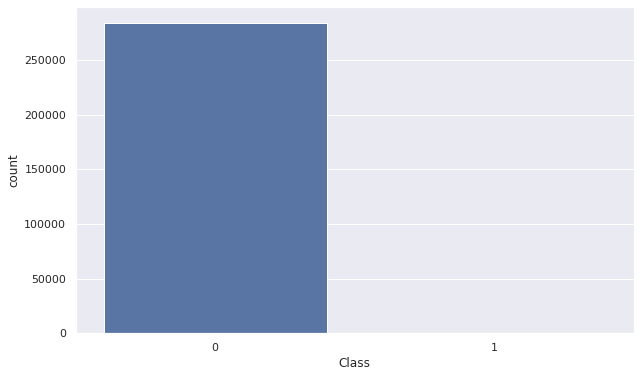

In [18]:
sns.set()

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot('Class', data=df, ax=ax)
plt.show()

In [19]:
print("Total\n{}".format(df.Class.value_counts()))
print("Porcentagem  Classe 0:  {:,.4f}%".format((df.Class.value_counts()[0]) / (df.shape[0]) * 100))
print("Porcentagem  Classe 1:  {:,.4f}%".format((df.Class.value_counts()[1]) / (df.shape[0]) * 100))

Total
0    284315
1       492
Name: Class, dtype: int64
Porcentagem  Classe 0:  99.8273%
Porcentagem  Classe 1:  0.1727%


Verificamos que o dataset se encontra altamente desbalanceado.

#Treino e predição do modelo - Sem balanceamento

Sem balanceamento

##Treino

In [21]:
#import das bibliotecas
from sklearn.linear_model import LogisticRegression

In [22]:
#criar o modelo
model = LogisticRegression()

In [23]:
#treinar o modelo
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Predição

In [24]:
#variavel de predição
y_pred = model.predict(X_test)

#Métricas

In [25]:
#módulos de métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##Relatório de classificação

In [26]:
print('Relatório de classificação \n', classification_report(y_test, y_pred))

Relatório de classificação 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.93      0.73      0.82       132

    accuracy                           1.00     71202
   macro avg       0.97      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202



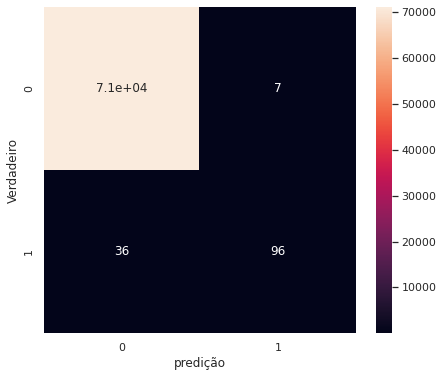

In [27]:
#matrix de confusão
fig, ax = plt.subplots(figsize = (7,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
ax.set_xlabel('predição')
ax.set_ylabel('Verdadeiro')
plt.show()

Acurácia em 100% devido o modelo ter se tornado muito bom em detectar transações legítimas, os verdadeiros negagivos!

#Treino e predição do modelo - Com Balanceamento

##Balanceamento

In [28]:
#biblioteca de samplim
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Vamos a técnica Under-sampling. 

O pré-processamentoserá realizado com a  biblioteca `imblearn` com sua classe `RandomUnderSampler` e chamar o método `fit_sample(X_train, y_train)`.

Vamos usar o metodo under-sampling em cima do conjunto de treino, e não de todos os dados. Isso é muito importante para não desconfigurarmos a característica de teste original.

0    213245
1       360
Name: Class, dtype: int64
1    360
0    360
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
#instanciar o modelo
rus = RandomUnderSampler()

In [31]:
#treinar o modelo
X_res, y_res = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
#verificar a quantidade a partir da y_res e y_test, serie unidemensional
print(pd.Series(y_train).value_counts())
print(pd.Series(y_res).value_counts())

0    213245
1       360
Name: Class, dtype: int64
1    360
0    360
dtype: int64


Podemos ver a grande diferença!

##Treino do modelo com os dados balanceados

Como os dados estão balanceados, vamos treiná-los e testálos com o mesmo X_test, (dados não vistos pelo modelo)

Verificar as métricas

In [34]:
#realtório
print('Relatório de Classificação\n', classification_report(y_test, y_pred_res))

Relatório de Classificação
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     71070
           1       0.03      0.96      0.07       132

    accuracy                           0.95     71202
   macro avg       0.52      0.96      0.52     71202
weighted avg       1.00      0.95      0.97     71202



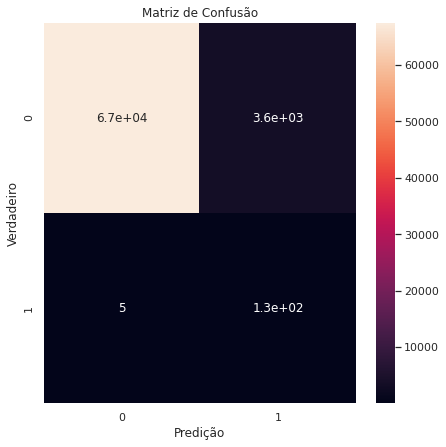

In [35]:
fig, ax  = plt.subplots(figsize=(7,7))

sns.heatmap(confusion_matrix(y_test, y_pred_res), annot=True, ax=ax)
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predição')
ax.set_title('Matriz de Confusão')
plt.show()

Conseguimos melhorar a métrica da sensibilidade, que é a capacidade de detectar mais falsos negativos.



Fonte: https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/
